In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from load_data import load_data_from_postgres
from overview_analysis import (
    clean_data,
    perform_eda,
    identify_top_10_handsets,
    identify_top_3_manufacturers,
    identify_top_5_handsets_per_manufacturer,
    plot_top_10_handsets,
    plot_top_5_handsets_per_manufacturer,
    provide_recommendation
)

In [2]:
# Define your SQL query
query = "SELECT * FROM xdr_data;" 
data = load_data_from_postgres(query)
if data is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [3]:
# Clean the data
data = clean_data(data)
if data is not None:
    print("Successfully cleaned the data")
else:
    print("Failed to clean the data.")
    

Successfully cleaned the data


Missing values:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        0
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps

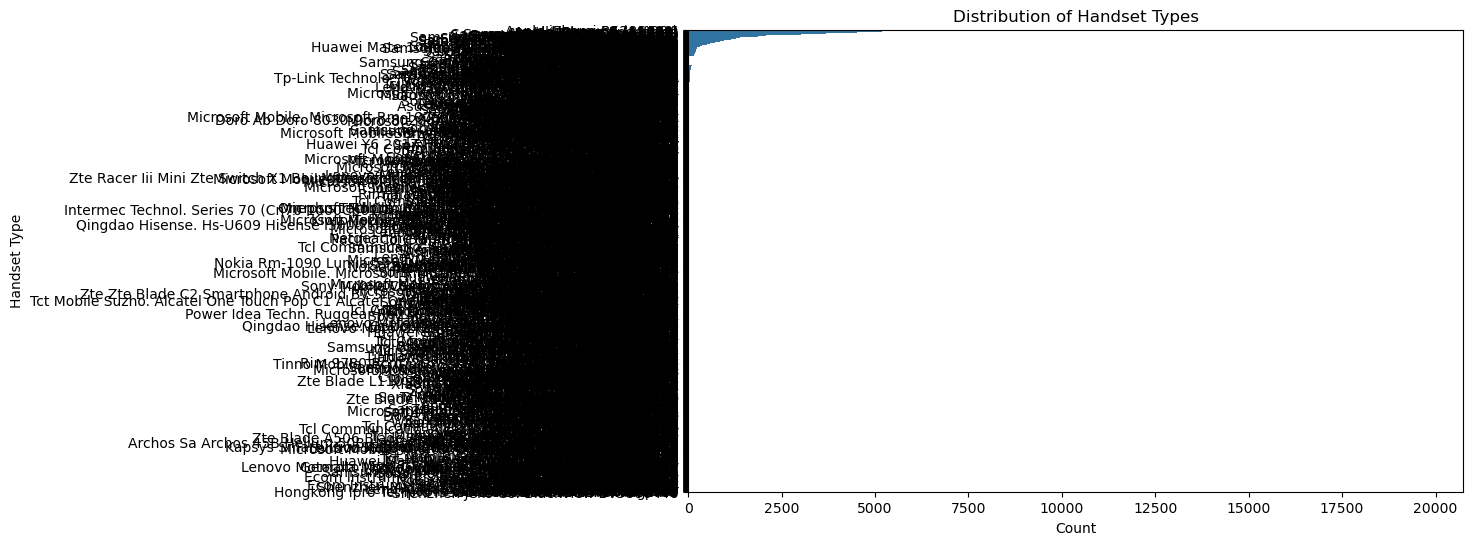

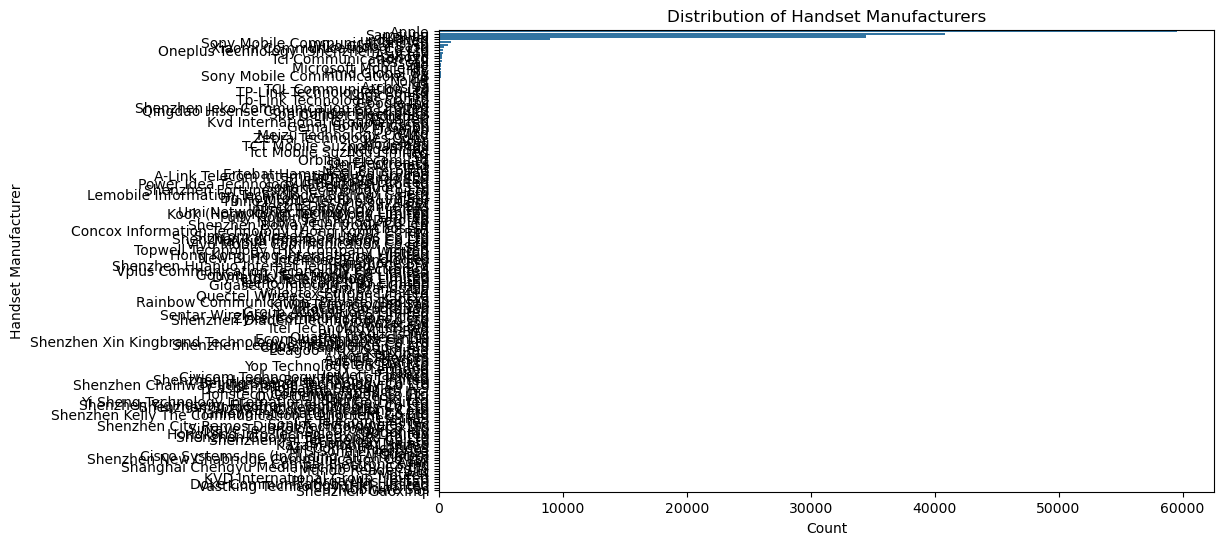

In [4]:
# perform EDA
perform_eda(data)

In [5]:
# identify top 10 handsets
top_10_handsets = identify_top_10_handsets(data)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [6]:
# top 3 manufacturers
top_3_manufacturers = identify_top_3_manufacturers(data)
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [7]:
# top 5 handsets per manufacturer
top_5_handsets_per_manufacturer = identify_top_5_handsets_per_manufacturer(data, top_3_manufacturers)
print(top_5_handsets_per_manufacturer)


{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64, 'Huawei': Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64}


c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\overview_analysis.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette='viridis')


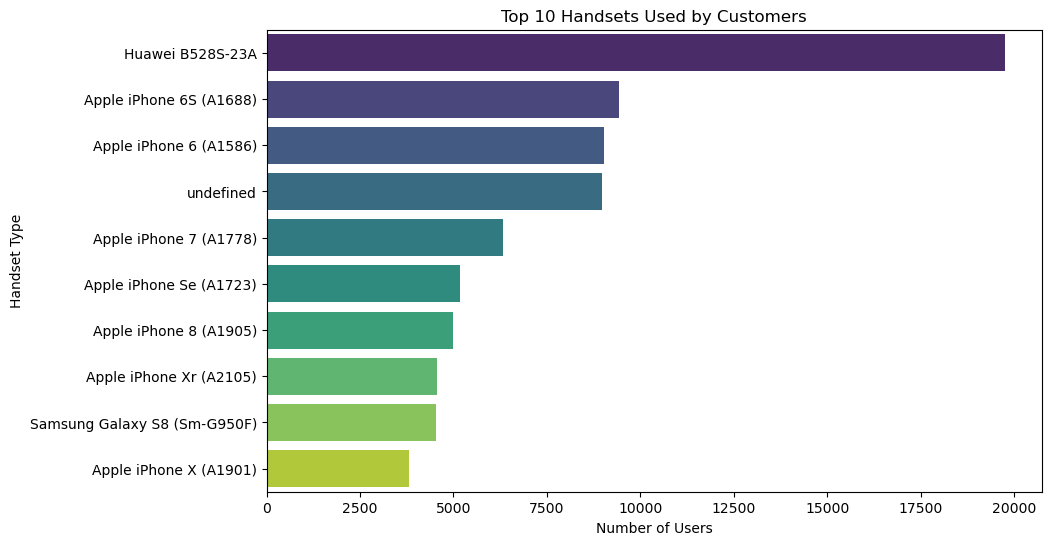

In [8]:
plot_top_10_handsets(top_10_handsets)

c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\overview_analysis.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.values, y=handsets.index, palette='viridis')


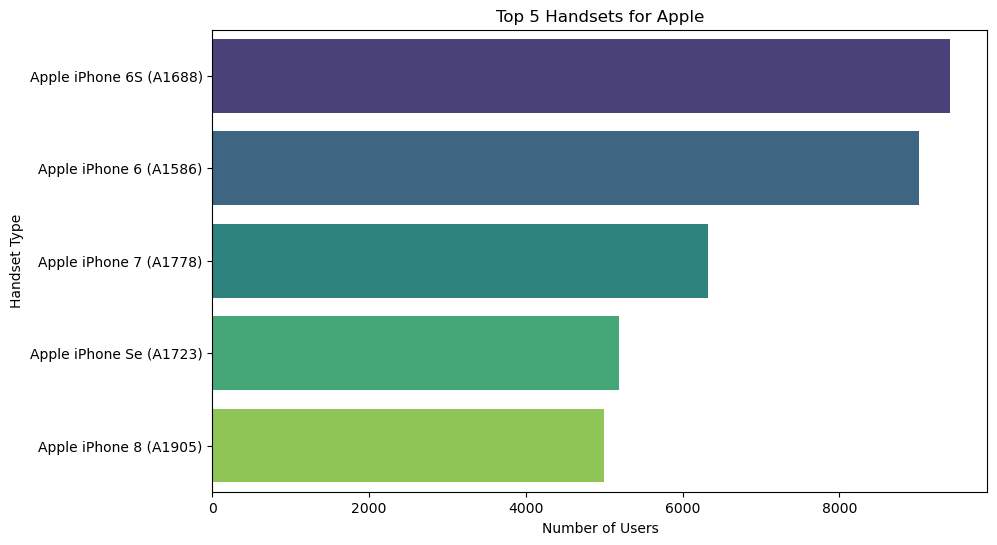

c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\overview_analysis.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.values, y=handsets.index, palette='viridis')


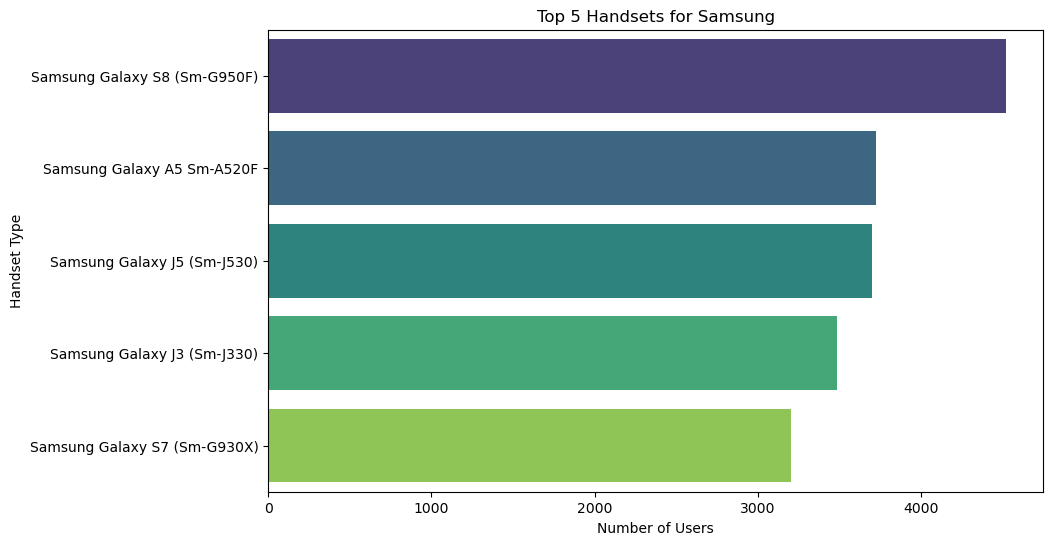

c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\overview_analysis.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=handsets.values, y=handsets.index, palette='viridis')


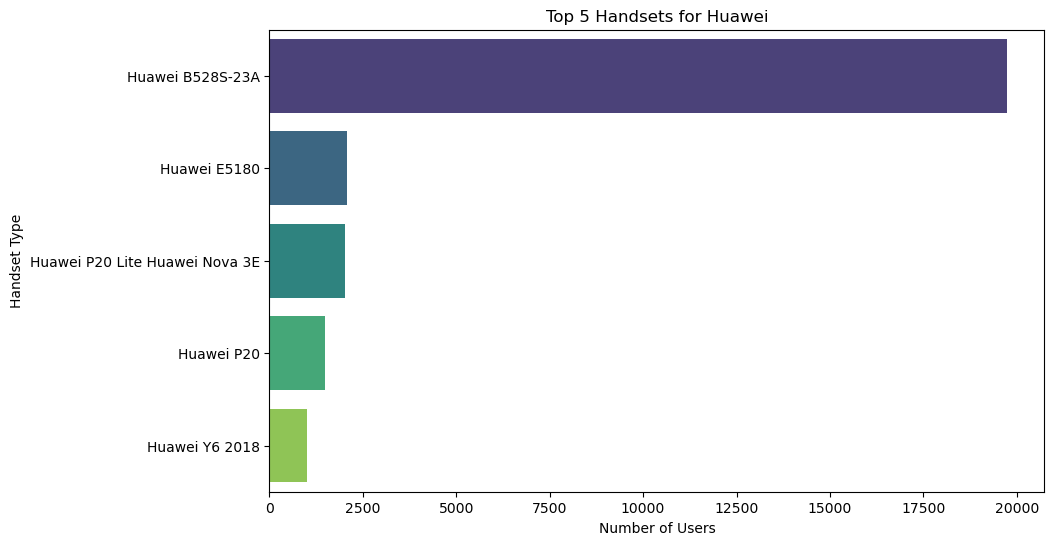

In [9]:
plot_top_5_handsets_per_manufacturer(top_5_handsets_per_manufacturer)

In [10]:
# provide recommendation
provide_recommendation(top_10_handsets, top_3_manufacturers, top_5_handsets_per_manufacturer)


    Based on the analysis, the following insights have been identified:

    1. **Top 10 Handsets**:
    The top 10 handsets used by customers are:
    Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813

    2. **Top 3 Handset Manufacturers**:
    The top 3 handset manufacturers are:
    Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423

    3. **Top 5 Handsets per Top 3 Manufacturers**:
    The top 5 handsets for each of the top 3 manufacturers are:
    
    - Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905